In [ ]:
# 감성분석
# 1. machine learning
# 2. 감성어사전

In [ ]:
# 1. machine learning

In [ ]:
# classification

# - 지도학습(supervised learning) : 예측대상(y, label)을 예측하는 모델.. 분류분석, 회귀분석
# - 분류분석(classification) : 예측대상이 categorical data 
# - 회귀분석(regression) : 예측대상이 연속값. 
# - text classification
#   감성분석 : 좋고, 나쁨의 감성적인 문서분류, 예) 긍정댓글, 부정댓글
#              뉴스기사의 카테고리 예측.. 스펨이메일 분류.. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
pos_review = glob.glob("./textminning_files/comments_sample/comments_sample/pos/*.txt")
pos_review

['./textminning_files/comments_sample/comments_sample/pos\\0_9.txt',
 './textminning_files/comments_sample/comments_sample/pos\\100_7.txt',
 './textminning_files/comments_sample/comments_sample/pos\\10_9.txt',
 './textminning_files/comments_sample/comments_sample/pos\\11_9.txt',
 './textminning_files/comments_sample/comments_sample/pos\\12_9.txt',
 './textminning_files/comments_sample/comments_sample/pos\\13_7.txt',
 './textminning_files/comments_sample/comments_sample/pos\\14_10.txt',
 './textminning_files/comments_sample/comments_sample/pos\\15_7.txt',
 './textminning_files/comments_sample/comments_sample/pos\\16_7.txt',
 './textminning_files/comments_sample/comments_sample/pos\\17_9.txt',
 './textminning_files/comments_sample/comments_sample/pos\\18_7.txt',
 './textminning_files/comments_sample/comments_sample/pos\\19_10.txt',
 './textminning_files/comments_sample/comments_sample/pos\\1_7.txt',
 './textminning_files/comments_sample/comments_sample/pos\\20_9.txt',
 './textminning_fil

In [13]:
f= open(pos_review[0], 'r')
f.read()

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [17]:
lines_pos = []

for i in pos_review[:100]:
    try:
        f = open(i, 'r')
        lines_pos.append(f.read())
        f.close()
    except:
        continue

In [18]:
len(lines_pos)

100

In [19]:
neg_review = glob.glob("./textminning_files/comments_sample/comments_sample/neg/*.txt")[:100]
neg_review

['./textminning_files/comments_sample/comments_sample/neg\\0_3.txt',
 './textminning_files/comments_sample/comments_sample/neg\\100_3.txt',
 './textminning_files/comments_sample/comments_sample/neg\\10_2.txt',
 './textminning_files/comments_sample/comments_sample/neg\\11_3.txt',
 './textminning_files/comments_sample/comments_sample/neg\\12_1.txt',
 './textminning_files/comments_sample/comments_sample/neg\\13_2.txt',
 './textminning_files/comments_sample/comments_sample/neg\\14_2.txt',
 './textminning_files/comments_sample/comments_sample/neg\\15_1.txt',
 './textminning_files/comments_sample/comments_sample/neg\\16_3.txt',
 './textminning_files/comments_sample/comments_sample/neg\\17_3.txt',
 './textminning_files/comments_sample/comments_sample/neg\\18_3.txt',
 './textminning_files/comments_sample/comments_sample/neg\\19_4.txt',
 './textminning_files/comments_sample/comments_sample/neg\\1_1.txt',
 './textminning_files/comments_sample/comments_sample/neg\\20_1.txt',
 './textminning_files

In [20]:
lines_neg = []

for i in neg_review[:100]:
    try:
        f = open(i, 'r')
        lines_neg.append(f.read())
        f.close()
    except:
        continue

In [22]:
len(lines_neg)

100

In [23]:
# 앞에 긍정 댓글 100개, 뒤에 부정 댓글 100를 담고 있는 리스트

total_text = lines_pos + lines_neg

In [25]:
len(total_text)

200

In [26]:
# 긍정 댓글과 부정 댓글의 label생성

In [29]:
list(np.repeat('pos', 100))

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos']

In [30]:
list(np.repeat('neg', 100))

['neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg']

In [32]:
class_idx = list(np.repeat('pos', 100)) + list(np.repeat('neg', 100))
print(class_idx)

['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg'

In [34]:
# TfidfVectorize
# tf : 특정 단어가 특정 문서에 나타난 빈도
# df : 특정 단어가 전체 문서에서 나타난 빈도..
# tfidf (tf/ df) : 특정 문서에서의 특정 단어의 중요도(비중)

In [40]:
total_text[:2]

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
 "Scott Bartlett's 'OffOn' is nine minutes of pure craziness. It is a full-frontal assault of psychedelic, pulsating, epilepsy-inducing flashing lights and colours, and the first true m

In [35]:
stop_words = stopwords.words('english')

In [38]:
vect = TfidfVectorizer(stop_words = stop_words).fit(total_text)
x = vect.transform(total_text)

In [41]:
x.toarray().shape

(200, 5923)

In [43]:
vect.get_feature_names()

['00',
 '000',
 '08',
 '10',
 '100',
 '11',
 '120',
 '14',
 '15',
 '16',
 '18',
 '1920',
 '1930s',
 '1944',
 '1945',
 '1946',
 '1947',
 '1949er',
 '1950s',
 '1953',
 '1954',
 '1957',
 '1959',
 '1960s',
 '1963',
 '1964',
 '1966',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1975',
 '1979',
 '1980',
 '1980s',
 '1984',
 '1987',
 '1989',
 '1990',
 '1998',
 '1999',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2001',
 '2003',
 '2004',
 '2007',
 '2008',
 '21',
 '23rd',
 '24',
 '25',
 '30',
 '3000',
 '300mln',
 '30s',
 '33',
 '35',
 '360',
 '3d',
 '40',
 '43',
 '50',
 '50s',
 '60',
 '60s',
 '69',
 '6million',
 '6th',
 '70',
 '70s',
 '72nd',
 '73',
 '75',
 '7ft',
 '7th',
 '80',
 '80s',
 '8th',
 '8쩍',
 '90',
 '90s',
 '94',
 '99',
 'aaron',
 'abandon',
 'abandoned',
 'abandonment',
 'abducted',
 'abiding',
 'abilities',
 'ability',
 'able',
 'abominable',
 'abominably',
 'abroad',
 'abruptly',
 'absence',
 'absolute',
 'absolutely',
 'abstract',
 'absurd',
 'abuse',
 'abusive',
 'academy

In [47]:
x = pd.DataFrame(x.toarray(), columns = vect.get_feature_names())

In [48]:
y = class_idx

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [53]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [55]:
preds = log.predict(x_test)
preds

array(['neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos',
       'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'pos'], dtype='<U3')

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.89      0.89      0.89        18
         pos       0.91      0.91      0.91        22

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000, max_depth=10)
rfc.fit(x_train, y_train)
preds = rfc.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.93      0.78      0.85        18
         pos       0.84      0.95      0.89        22

    accuracy                           0.88        40
   macro avg       0.89      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40



In [ ]:
# 2. 감성어 사전 활용.

In [68]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

In [70]:
!pip install Afinn

  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53455 sha256=dcae2c75185763b4e238c95ad7efe22d002ce796b432bcff0ad00a3e8d9d17a9
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built Afinn


In [71]:
from afinn import Afinn

In [75]:
lines_pos
lines_neg

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "OK its not the best film I've ever seen but at the same time I've been able to sit and watch it TWICE!!! story line was pretty awful and during the first part of the first short story i wondered what the hell i was watching but at the same time it was so awful i loved it cheap laughs all the way.<br /><br />And Jebidia deserves an Oscar

In [76]:
# afinn
# -15 ~ 20 : 감정점수를 리턴..

In [79]:
afin = Afinn()
afin.score(lines_pos[10])

7.0

In [80]:
afin = Afinn()
afin.score(lines_neg[10])

-3.0

In [ ]:
# 감성어사전 : NRC

In [82]:
nrc = pd.read_csv('./textminning_files/NRC.txt', sep = '\t')
nrc

,aback,anger,0
0,aback,anticipation,0
1,aback,disgust,0
2,aback,fear,0
3,aback,joy,0
4,aback,negative,0
...,...,...,...
141814,zoom,negative,0
141815,zoom,positive,0
141816,zoom,sadness,0
141817,zoom,surprise,0


In [88]:
nrc[nrc['aback'] == 'love']

,aback,anger,0
75089,love,anger,0
75090,love,anticipation,0
75091,love,disgust,0
75092,love,fear,0
75093,love,joy,1
75094,love,negative,0
75095,love,positive,1
75096,love,sadness,0
75097,love,surprise,0
75098,love,trust,0


In [90]:
nrc.iloc[:,1].value_counts()

surprise        14182
negative        14182
anticipation    14182
trust           14182
sadness         14182
joy             14182
disgust         14182
positive        14182
fear            14182
anger           14181
Name: anger, dtype: int64

In [97]:
nrc = nrc[(nrc != 0).all(1)]
nrc

,aback,anger,0
18,abacus,trust,1
22,abandon,fear,1
24,abandon,negative,1
26,abandon,sadness,1
29,abandoned,anger,1
...,...,...,...
141740,zest,anticipation,1
141743,zest,joy,1
141745,zest,positive,1
141748,zest,trust,1


In [98]:
nrc[nrc['aback'] == 'happy']

,aback,anger,0
57870,happy,anticipation,1
57873,happy,joy,1
57875,happy,positive,1
57878,happy,trust,1


In [99]:
nrc[nrc['aback'] == 'dislike']

,aback,anger,0
37149,dislike,anger,1
37151,dislike,disgust,1
37154,dislike,negative,1


In [103]:
nrc = nrc.reset_index(drop=True)
nrc

,aback,anger,0
0,abacus,trust,1
1,abandon,fear,1
2,abandon,negative,1
3,abandon,sadness,1
4,abandoned,anger,1
...,...,...,...
13896,zest,anticipation,1
13897,zest,joy,1
13898,zest,positive,1
13899,zest,trust,1


In [104]:
tokenizer = RegexpTokenizer('[\w]+')  # word기준으로 tokenize

In [105]:
stop_words = stopwords.words('english')

In [106]:
ps_stammer = PorterStemmer()

In [157]:
rev = lines_pos[30]

In [158]:
rev = rev.lower()
rev

'another good stooge short!christine mcintyre is so lovely and evil and the same time in this one!she is such a great actress!the stooges are very good and especially shemp and larry!this to is a good one to watch around autumn time!'

In [159]:
rev = tokenizer.tokenize(rev)

In [160]:
rev = [ps_stammer.stem(i) for i in rev]

In [161]:
rev = [i for i in rev if i not in stop_words]
rev

['anoth',
 'good',
 'stoog',
 'short',
 'christin',
 'mcintyr',
 'love',
 'evil',
 'time',
 'thi',
 'one',
 'great',
 'actress',
 'stoog',
 'veri',
 'good',
 'especi',
 'shemp',
 'larri',
 'thi',
 'good',
 'one',
 'watch',
 'around',
 'autumn',
 'time']

In [162]:
nrc.iloc[:, 1].values

array(['trust', 'fear', 'negative', ..., 'positive', 'trust', 'negative'],
      dtype=object)

In [164]:
rev_matching = [i for i in rev if i in nrc.iloc[:, 0].values]
rev_matching

['good', 'love', 'evil', 'time', 'good', 'good', 'watch', 'time']

In [182]:
# emotions : matching 단어들의 감성어 집합...
emotions = []
for r in rev_matching:
    emotions.extend(list(nrc[nrc['aback'] == r]['anger'].values))
emotions

['anticipation',
 'joy',
 'positive',
 'surprise',
 'trust',
 'joy',
 'positive',
 'anger',
 'disgust',
 'fear',
 'negative',
 'sadness',
 'anticipation',
 'anticipation',
 'joy',
 'positive',
 'surprise',
 'trust',
 'anticipation',
 'joy',
 'positive',
 'surprise',
 'trust',
 'anticipation',
 'fear',
 'anticipation']

In [186]:
sent_result = pd.Series(emotions).value_counts()
sent_result

anticipation    6
positive        4
joy             4
surprise        3
trust           3
fear            2
sadness         1
negative        1
anger           1
disgust         1
dtype: int64

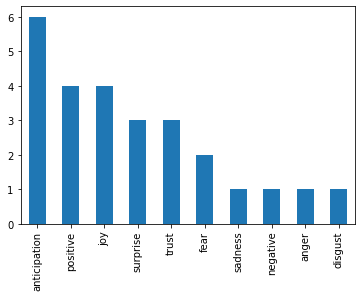

In [187]:
sent_result.plot(kind='bar')

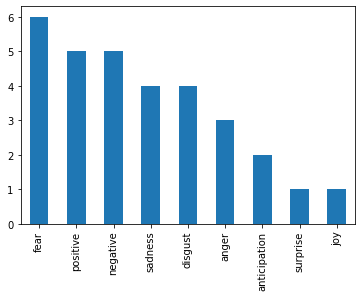

In [189]:
rev = lines_neg[30]
rev = rev.lower()
rev = tokenizer.tokenize(rev)
rev = [ps_stammer.stem(i) for i in rev]
rev = [i for i in rev if i not in stop_words]
rev_matching = [i for i in rev if i in nrc.iloc[:, 0].values]

emotions = []
for r in rev_matching:
    emotions.extend(list(nrc[nrc['aback'] == r]['anger'].values))
    
sent_result = pd.Series(emotions).value_counts()
sent_result.plot(kind='bar')

In [212]:
def emotionf(s1):
    emotion_score = 0
    for i in s1:
        if i in ('positive','anticipation', 'trust','joy','surprise'):
            emotion_score += 1
        else:
            emotion_score -= 1
    return emotion_score

In [213]:
emotionf(emotions)

-13

In [214]:
def emotion_dictionary_score(reveiw):
    rev = review
    rev = rev.lower()
    rev = tokenizer.tokenize(rev)
    rev = [ps_stammer.stem(i) for i in rev]
    rev = [i for i in rev if i not in stop_words]
    rev_matching = [i for i in rev if i in nrc.iloc[:, 0].values]

    emotions = []
    for r in rev_matching:
        emotions.extend(list(nrc[nrc['aback'] == r]['anger'].values))

    sent_result = pd.Series(emotions).value_counts()
#     sent_result.plot(kind='bar')
    
    emotion_score = emotionf(emotions)
    
    return emotion_score

In [224]:
review = lines_pos[55]

emotion_dictionary_score(review)

1

In [225]:
score_sum = 0
for i in range(100):
    review = lines_pos[i]
    score = emotion_dictionary_score(review)
    score_sum += score
score_sum

1132

In [226]:
score_sum = 0
for i in range(100):
    review = lines_neg[i]
    score = emotion_dictionary_score(review)
    score_sum += score
score_sum

423